In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
rating = pd.read_csv("../dataset/rating_final1.csv")
rating.head(10)

,movie_id,user_id,rate
0,tt0032455,ur156820301,5.0
1,tt0032455,ur89008813,3.0
2,tt0104652,ur0281280,6.0
3,tt0104652,ur104436023,2.0
4,tt0104652,ur94900494,10.0
5,tt3901826,ur58133658,10.0
6,tt1488589,ur57257775,6.0
7,tt0441773,ur66705434,9.0
8,tt0097757,ur1192901,10.0
9,tt7979580,ur0337549,2.0


In [60]:
print("Number of Rows", rating.shape[0])
print("Number of Column", rating.shape[1])

Number of Rows 39999
Number of Column 3


In [61]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  39999 non-null  object 
 1   user_id   39999 non-null  object 
 2   rate      39999 non-null  float64
dtypes: float64(1), object(2)
memory usage: 937.6+ KB


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

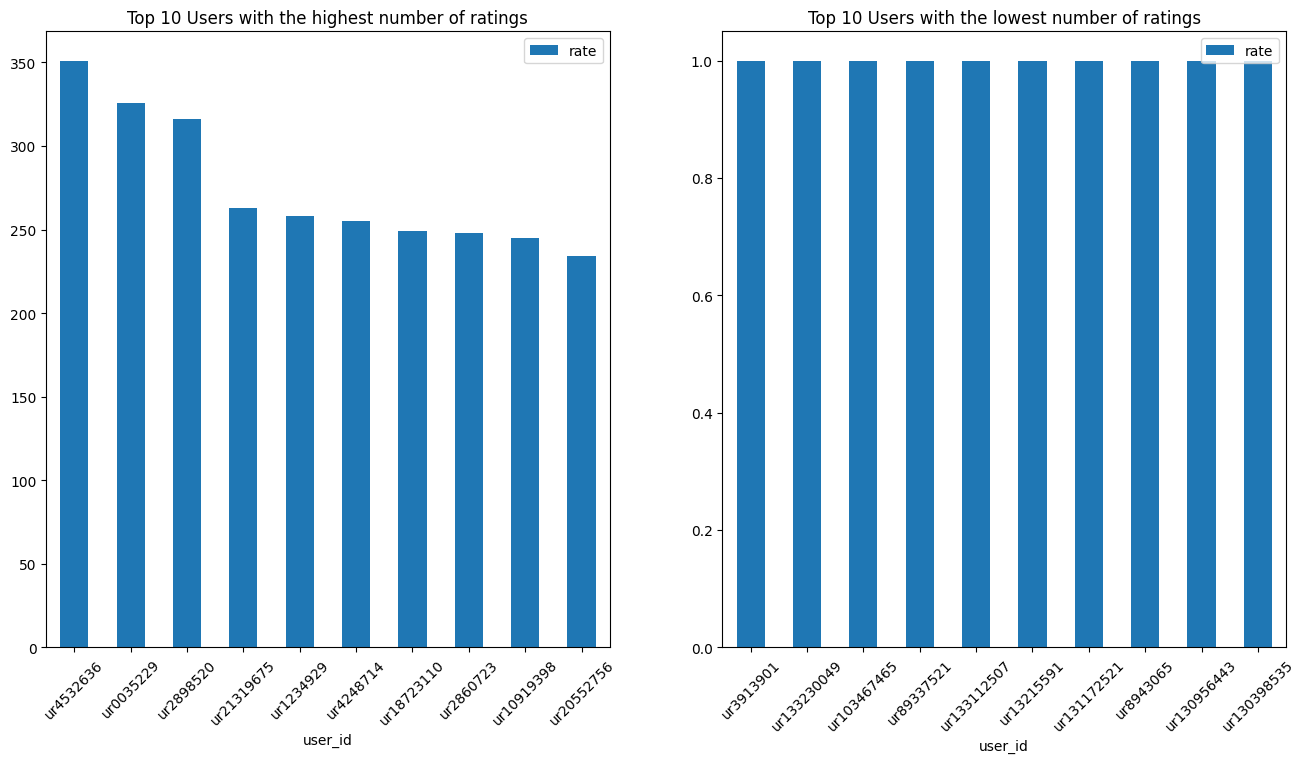

In [62]:
fig, axs = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

df1 = pd.DataFrame(rating.groupby('user_id')['rate'].count().sort_values(ascending=False).head(10))
df1.plot.bar(ax=axs[0])
axs[0].set(title='Top 10 Users with the highest number of ratings')
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

df2 = pd.DataFrame(rating.groupby('user_id')['rate'].count().sort_values(ascending=True).head(10))
df2.plot.bar(ax=axs[1])
axs[1].set(title='Top 10 Users with the lowest number of ratings')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)


- Nhận xét: 
    + Top 10 người dùng có số lượng ratings cao nhất:
        - Người dùng có số lượng ratings cao nhất là 351 ratings
        - Số lượng ratings của các người dùng trong nhóm này giảm dần từ 351 xuống 234.
        - Có một sự chênh lệch khá lớn giữa người dùng có số lượng ratings cao nhất và người dùng có số lượng ratings thấp nhất trong nhóm này.
    + Top 10 người dùng có số lượng ratings thấp nhất:
        - Các người dùng có số lượng ratings thấp nhất là 22 ratings
        - Số lượng ratings của các người dùng trong nhóm này tương đối thấp và không có sự chênh lệch lớn giữa các giá trị.
    + So sánh:
        - Sự chênh lệch về số lượng ratings giữa hai nhóm là rất rõ rệt.
        - Nhóm "Top người dùng có số lượng ratings cao nhất" quyết định đến kết quả và dữ liệu tổng thể vì có sự đa dạng và số lượng ratings lớn.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

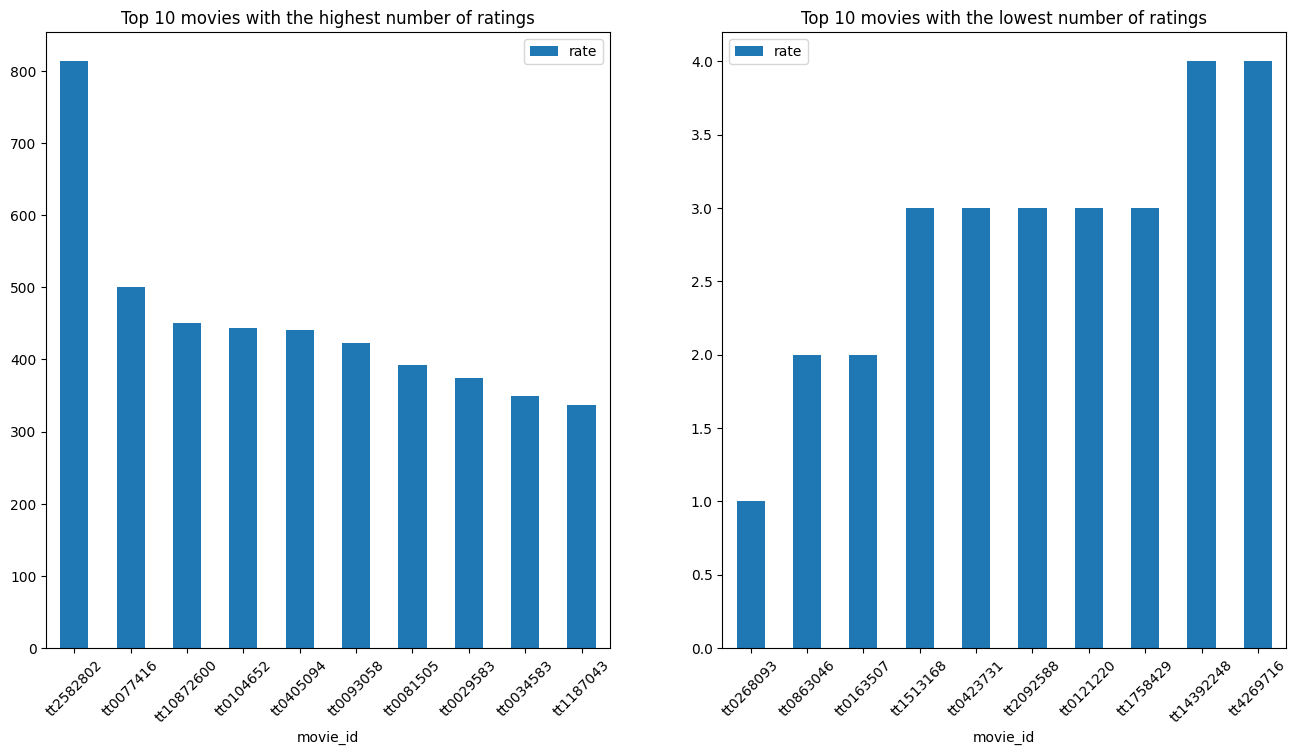

In [63]:
fig, axs = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

df1 = pd.DataFrame(rating.groupby('movie_id')['rate'].count().sort_values(ascending=False).head(10))
df1.plot.bar(ax=axs[0])
axs[0].set(title='Top 10 movies with the highest number of ratings')
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)


df2 = pd.DataFrame(rating.groupby('movie_id')['rate'].count().sort_values(ascending=True).head(10))
df2.plot.bar(ax=axs[1])
axs[1].set(title='Top 10 movies with the lowest number of ratings')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

- Nhận xét: 
    + Top 10 phim có số lượng ratings cao nhất:
        - Phim có số lượng ratings cao nhất là 882 ratings
        - Số lượng ratings của các phim trong nhóm này giảm dần từ 882 xuống 389.
        - Có sự chênh lệch đáng kể giữa phim có số lượng ratings cao nhất và phim có số lượng ratings thấp nhất trong nhóm này.
    + Top 10 phim có số lượng ratings thấp nhất:
        - Các phim có số lượng ratings thấp nhất là 4 ratings
        - Số lượng ratings của các phim trong nhóm này tương đối thấp và không có sự chênh lệch lớn giữa các giá trị.
    + So sánh:
        - Sự chênh lệch về số lượng ratings giữa hai nhóm là rất rõ rệt. "Nhóm phim có số lượng ratings cao nhất" nhận được sự quan tâm và đánh giá nhiều hơn đáng kể so với "Nhóm phim có số lượng ratings thấp nhất".
        - Nhóm phim có số lượng ratings cao nhất có khả năng có ảnh hưởng mạnh hơn đến kết quả và dữ liệu tổng thể, có thể được xem là những phim phổ biến và thu hút được sự quan tâm của đông đảo người dùng.
        - Nhóm phim có số lượng ratings thấp nhất có thể không đại diện chính xác cho chất lượng và đánh giá của toàn bộ danh sách phim, và có thể có ảnh hưởng ít đáng kể đến dữ liệu tổng thể.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

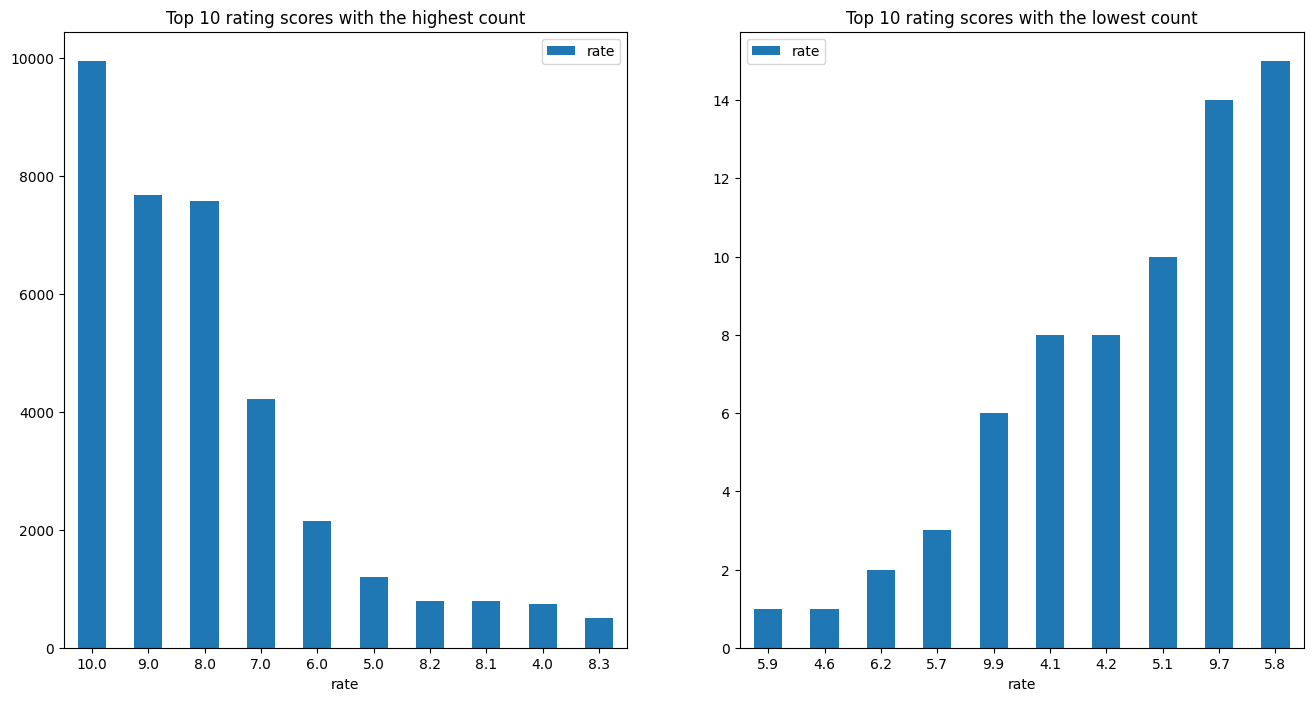

In [64]:
fig, axs = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

df1 = pd.DataFrame(rating.groupby('rate')['rate'].count().sort_values(ascending=False).head(10))
df1.plot.bar(ax=axs[0])
axs[0].set(title='Top 10 rating scores with the highest count')
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation='horizontal')

df2 = pd.DataFrame(rating.groupby('rate')['rate'].count().sort_values(ascending=True).head(10))
df2.plot.bar(ax=axs[1])
axs[1].set(title='Top 10 rating scores with the lowest count')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation='horizontal')




- Nhận xét: 
    + Top 10 điểm đánh giá có số lượng cao nhất:
        - Các điểm đánh giá trong nhóm này có số lượng đánh giá giảm từ 9943 xuống 1376
        - Rate 10.0 sao có số lượng cao nhất với 9943 lượt rate
    + Top 10 điểm đánh giá có số lượng thấp nhất:
        - Các điểm đánh giá trong nhóm này có số lượng đánh giá giao động từ 1 - 16.
        - Có một số rate chỉ nhận  điểm đánh giá 1 hoặc 2 lượt như: rate 5.2 sao, 4.9 sao, 3.3 sao ...
    + So sánh:
        - Số lượng đánh giá có thể ảnh hưởng đến độ tin cậy của đánh giá. Những điểm đánh giá có số lượng cao hơn có khả năng được đánh giá và xếp hạng dựa trên sự đồng thuận của nhiều người dùng.
        - Nhìn chung số lượng đánh giá cao đều nằm ở đánh giá có điểm cao cho thấy sự phổ biến và chất lượng của các phim có thể cao, và có thể dẫn đến sự tìm kiếm phim nhiều hơn.
        - Tuy nhiên, số lượng đánh giá không phản ánh trực tiếp chất lượng của phim. Cần xem xét thêm các yếu tố khác như đánh giá cụ thể, nội dung, thể loại và sở thích cá nhân để có cái nhìn toàn diện hơn về phim.

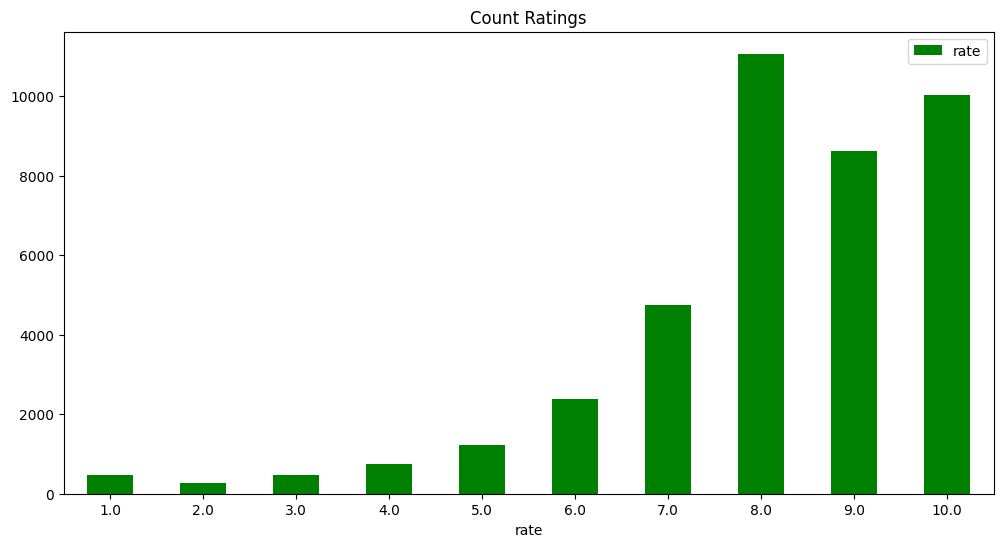

In [65]:
rating['rate'] = round(rating['rate'])
df1 = pd.DataFrame(rating.groupby('rate')['rate'].count())
# Plot the bar chart with colors
df1.plot.bar(figsize=(12, 6), color='green')
plt.title('Count Ratings')
plt.xticks(rotation ='horizontal')
plt.show()

- Nhận xét: 
    + Mức đánh giá 1.0 và 4.0:
        - Các mức đánh giá này có số lượng rate thấp hơn so với các mức đánh giá khác.
        - Mức đánh giá này cho thấy phim không được người dùng đánh giá tích cực hoặc có nhận định tiêu cực có số lượng rất ít.
    + Mức đánh giá từ 5.0 đến 7.0:
        - Sự tăng dần của số lượng rate từ mức 5.0 đến 7.0 có thể cho thấy sự quan tâm và đánh giá tích cực của người dùng đối với các mức đánh giá này.
    + Mức đánh giá từ 8.0 đến 10.0:
        - Số lượng rate tăng đáng kể từ mức 8.0 trở đi.
        - Sự tăng đột biến của số lượng rate từ mức 8.0 trở đi có thể cho thấy sự phổ biến và đánh giá tích cực của người dùng đối với các mức đánh giá cao như 8.0, 9.0 và 10.0.
    - Tổng quan, số lượng rate có thể tương quan với mức đánh giá của phim. Các mức đánh giá cao hơn có xu hướng có số lượng rate lớn hơn, trong khi các mức đánh giá thấp hơn có số lượng rate ít hơn

In [66]:
movies = pd.read_csv("../dataset/movie_final.csv")
movies.head(10)

,id,name,poster,directors,writers,genres,actors,releaseYear,limit,duration,language,origin
0,tt1630029,Avatar: The Way of Water,https://m.media-amazon.com/images/M/MV5BYjhiNj...,James Cameron,James Cameron|Rick Jaffa|Amanda Silver|,Action|Adventure|Fantasy,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,2022,PG-13,192,English,United States
1,tt0096283,My Neighbor Totoro,https://m.media-amazon.com/images/M/MV5BYzJjMT...,Hayao Miyazaki,Hayao Miyazaki,Animation|Comedy|Family,Hitoshi Takagi|Noriko Hidaka|Chika Sakamoto|Sh...,1988,G,86,Japanese,Japan
2,tt4729430,Klaus,https://m.media-amazon.com/images/M/MV5BMWYwOT...,Sergio Pablos|Carlos Martnez Lpez,Sergio Pablos|Jim Mahoney|Zach Lewis,Animation|Adventure|Comedy,Jason Schwartzman|J.K. Simmons|Rashida Jones|W...,2019,PG,96,English,Spain
3,tt4154796,Avengers: Endgame,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Anthony Russo|Joe Russo,Christopher Markus|Stephen McFeely|Stan Lee|,Action|Adventure|Drama,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,2019,PG-13,181,English,United States
4,tt9426210,Weathering with You,https://m.media-amazon.com/images/M/MV5BNzE4ZD...,Makoto Shinkai,Makoto Shinkai,Animation|Drama|Fantasy,Kotaro Daigo|Nana Mori|Tsubasa Honda|Sakura Ki...,2019,PG-13,112,Japanese,Japan
5,tt5897304,Mob Psycho 100,https://m.media-amazon.com/images/M/MV5BYWIwZj...,|,|,Animation|Action|Comedy,Setsuo Ito|Takahiro Sakurai|Chris Niosi|Akio t...,2022,TV-14,24,Japanese,Japan
6,tt2380307,Coco,https://m.media-amazon.com/images/M/MV5BYjQ5Nj...,Lee Unkrich|Adrian Molina,Lee Unkrich|Jason Katz|Matthew Aldrich|,Animation|Adventure|Comedy,Anthony Gonzalez|Gael Garca Bernal|Benjamin Br...,2017,PG,105,English,United States
7,tt0096697,The Simpsons,https://m.media-amazon.com/images/M/MV5BYjFkMT...,James L. Brooks|Matt Groening|Sam Simon,|,Animation|Comedy,Dan Castellaneta|Nancy Cartwright|Harry Sheare...,1989,TV-14,22,English,United States
8,tt4786824,The Crown,https://m.media-amazon.com/images/M/MV5BZTEyNj...,Peter Morgan,|,Biography|Drama|History,Claire Foy|Olivia Colman|Imelda Staunton|Matt ...,2023,TV-MA,58,English,United Kingdom
9,tt0120363,Toy Story 2,https://m.media-amazon.com/images/M/MV5BMWM5ZD...,John Lasseter|Ash Brannon|Lee Unkrich,John Lasseter|Pete Docter|Ash Brannon|,Animation|Adventure|Comedy,Tom Hanks|Tim Allen|Joan Cusack|Kelsey Grammer...,1999,G,92,Japanese,United States


In [67]:
print("Number of Rows", movies.shape[0])
print("Number of Column", movies.shape[1])

Number of Rows 490
Number of Column 12


In [68]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           490 non-null    object
 1   name         490 non-null    object
 2   poster       490 non-null    object
 3   directors    490 non-null    object
 4   writers      490 non-null    object
 5   genres       490 non-null    object
 6   actors       490 non-null    object
 7   releaseYear  490 non-null    int64 
 8   limit        490 non-null    object
 9   duration     490 non-null    int64 
 10  language     490 non-null    object
 11  origin       490 non-null    object
dtypes: int64(2), object(10)
memory usage: 46.1+ KB


In [69]:
genres = movies['genres']
for index, i in enumerate(genres):
    arr = i.split("|")
    movies['genres'][index] =  arr

C:\Users\dekub\AppData\Local\Temp\ipykernel_15324\3624480426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'][index] =  arr


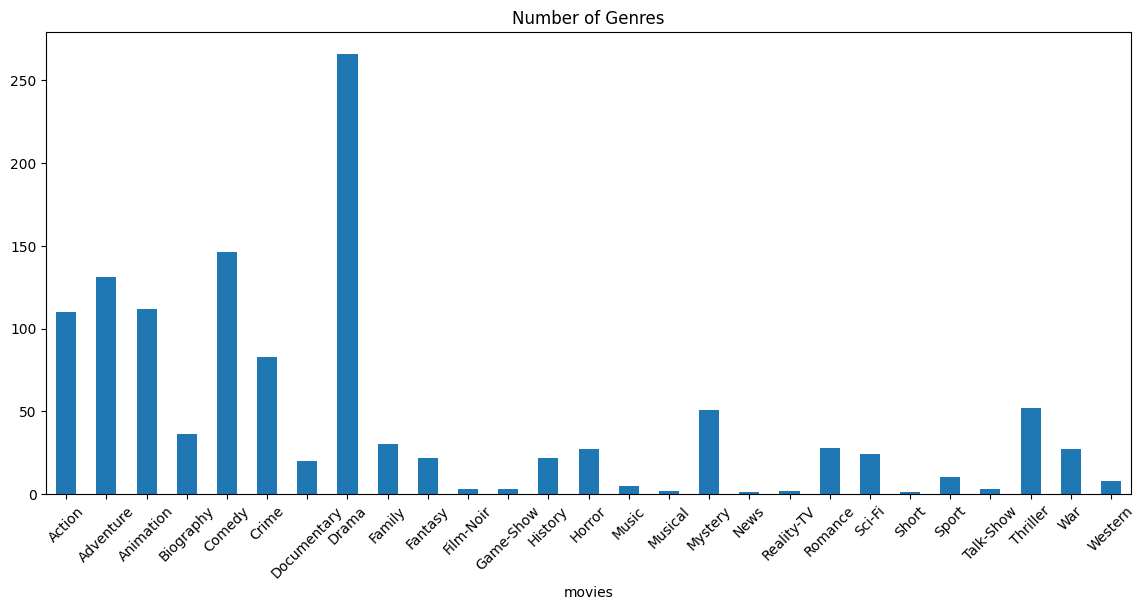

In [70]:
column_list = np.array(movies['genres']).flatten()
genres = np.concatenate(column_list)

data = {
    "movies" : genres
}

df = pd.DataFrame(data).groupby('movies').size()
df.plot.bar(figsize=(14,6))
plt.title('Number of Genres')
plt.xticks(rotation=45)
plt.show()

- Nhận xét: 
    + Các thể loại phổ biến: Có một số thể loại phim xuất hiện nhiều hơn các thể loại khác. Điển hình là thể loại Drama với 266 bộ phim, là thể loại nổi bật nhất trong số các thể loại được liệt kê. Comedy cũng có số lượng phim khá cao với 146 bộ phim.
    + Thể loại phiêu lưu và hành động: Các thể loại Adventure và Action cũng đứng trong top các thể loại phim phổ biến, với 131 và 110 bộ phim tương ứng. Điều này cho thấy rằng khán giả có sự quan tâm đáng kể đến những bộ phim phiêu lưu và hành động.
    + Thể loại hoạt hình: Thể loại Animation cũng có sự đại diện tốt, với 112 bộ phim. Điều này cho thấy sự quan tâm đến phim hoạt hình không chỉ ở khán giả trẻ em mà còn ở người xem trong mọi độ tuổi.
    + Các thể loại ít được khai thác: Một số thể loại có số lượng phim ít, như Film-Noir, Game-Show, Musical, News, Reality-TV và Short. Điều này có thể chỉ ra rằng các thể loại này không nhận được sự quan tâm lớn từ công chúng 
    + Thể loại đa dạng: Trong số các thể loại phim được liệt kê, có sự đa dạng về nội dung và thể loại. Bạn có thể tìm thấy cả các thể loại như Crime, Biography, History, Music, Mystery, Romance, Sci-Fi, Thriller, War và Western.
    + Tóm lại, việc trực quan hóa số lượng phim theo thể loại cung cấp một cái nhìn tổng quan về sự đa dạng và phân bố của các thể loại phim. Nó có thể giúp các nhà làm phim, nhà sản xuất và những người quan tâm đến ngành công nghiệp điện ảnh có cái nhìn rõ ràng hơn về xu hướng và sự quan tâm của khán giả.

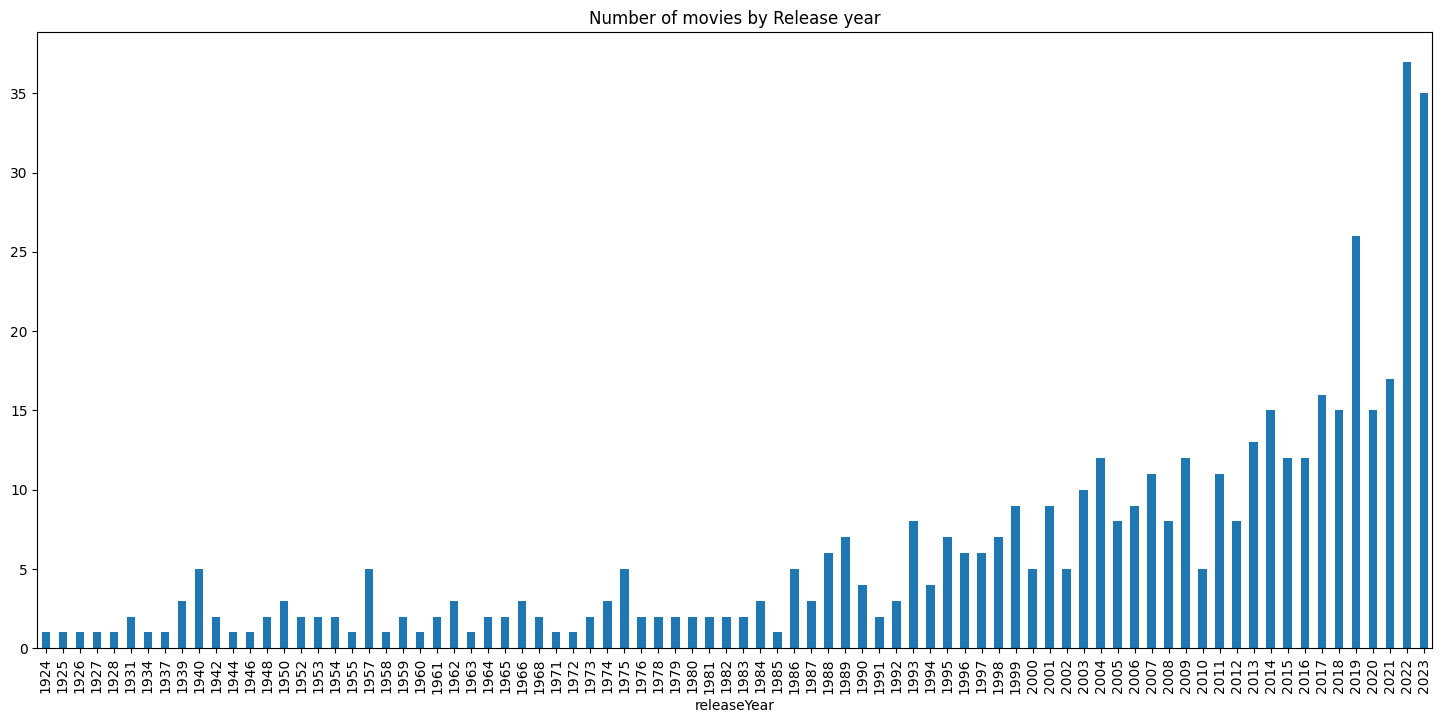

In [71]:
releaseYear = movies['releaseYear']
df = pd.DataFrame(movies['releaseYear']).groupby('releaseYear').size()
df.plot.bar(figsize=(18,8))
plt.title('Number of movies by Release year')
plt.show()

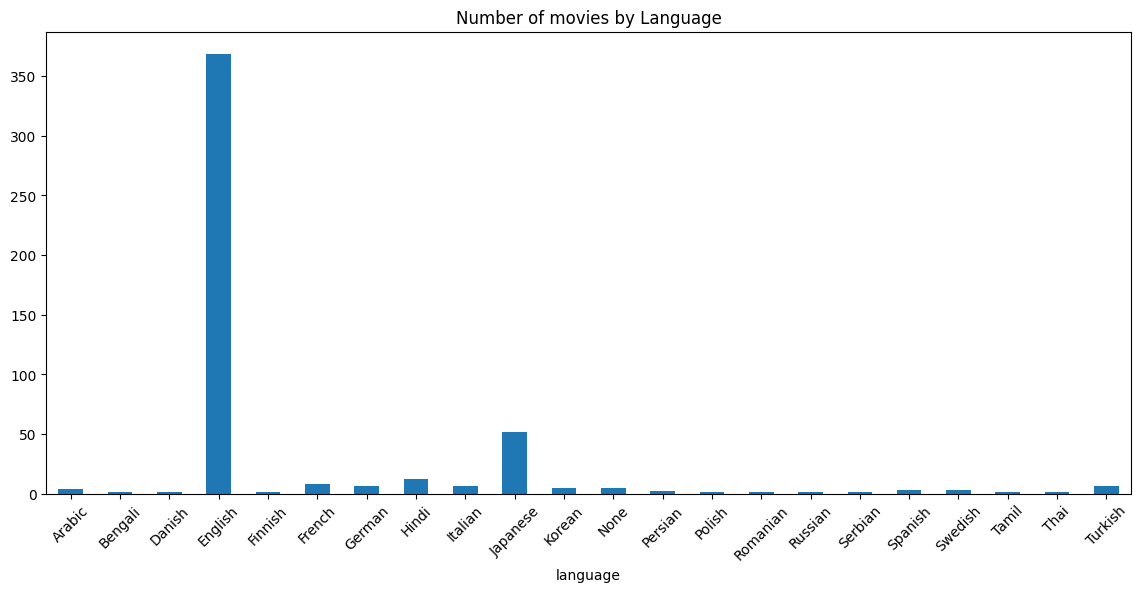

In [72]:
language = movies['language']
df = pd.DataFrame(movies['language']).groupby('language').size()
df.plot.bar(figsize=(14,6))
plt.title('Number of movies by Language')
plt.xticks(rotation=45)
plt.show()

- Nhận xét:     
    + Tiếng Anh (English) có số lượng phim nhiều nhất với 369 phim.
    + Tiếng Nhật (Japanese) đứng thứ hai với 52 phim.
    + Tiếng Hindi (Hindi) và Tiếng Pháp (French) cũng có số lượng phim khá đáng kể, lần lượt là 12 và 8 phim.
    + Một số ngôn ngữ khác như Tiếng Đức (German), Tiếng Tây Ban Nha (Spanish), Tiếng Ý (Italian), và Tiếng Hàn (Korean) cũng có một số phim đáng chú ý.
    + Có một số ngôn ngữ chỉ có ít phim hoặc chỉ có một phim duy nhất, chẳng hạn như Tiếng Ba Tư (Persian), Tiếng Ba Lan (Polish), Tiếng Rumani (Romanian), Tiếng Thái (Thai), Tiếng Đan Mạch (Danish), vv.
    + Nhìn chung ta thấy sự đa dạng ngôn ngữ trong bộ dữ liệu phim và những ngôn ngữ phổ biến như Tiếng Anh và Tiếng Nhật có sự xuất hiện nhiều hơn so với những ngôn ngữ khác.

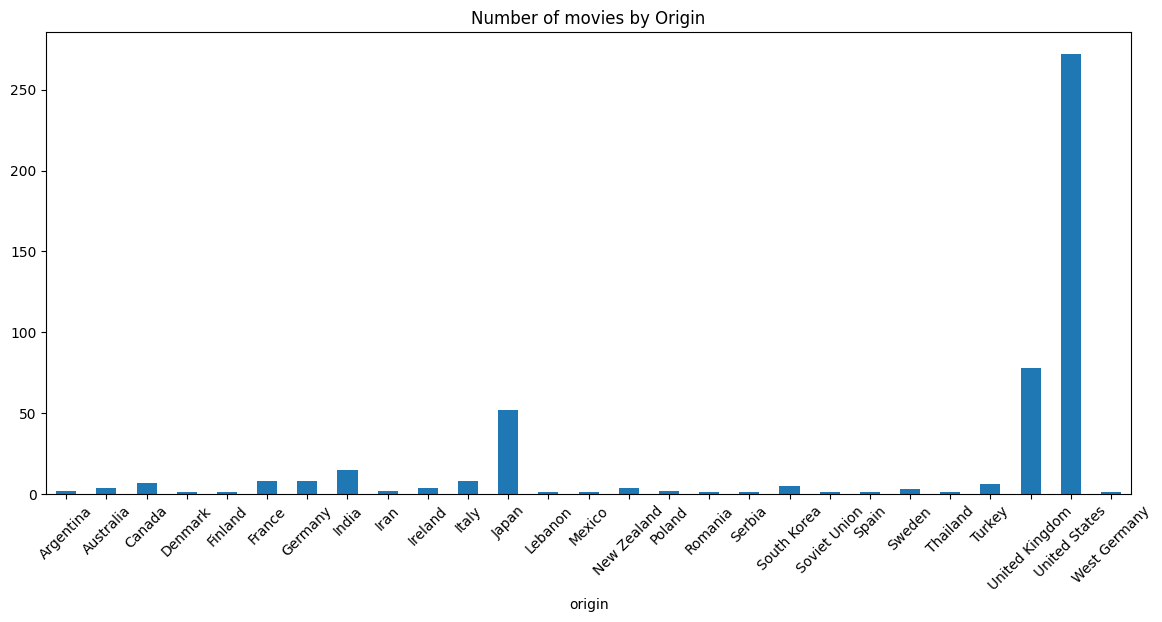

In [73]:
origin = movies['origin']
df = pd.DataFrame(movies['origin']).groupby('origin').size()
df.plot.bar(figsize=(14,6))
plt.title('Number of movies by Origin')
plt.xticks(rotation=45)
plt.show()

- Nhận xét: 
    + Quốc gia dẫn đầu: Hoa Kỳ (United States) là quốc gia sản xuất nhiều nhất với tổng cộng 272 bộ phim
    + Quốc gia thứ hai: Vị trí thứ hai thuộc về Vương quốc Anh (United Kingdom) với 78 bộ phim
    + Những quốc gia khác đáng chú ý: Nhật Bản (Japan) có sự đại diện mạnh mẽ, với 52 bộ phim. Ấn Độ (India) cũng có số lượng phim đáng kể, với 15 bộ phim
    + Phân bố đa dạng: Trực quan hóa cho thấy có sự đa dạng về nguồn gốc của các bộ phim. Nhiều quốc gia khác nhau như Pháp (France), Đức (Germany), Ý (Italy), Úc (Australia), Canada và Hàn Quốc (South Korea) cũng có sự đại diện với số lượng phim từ 4 đến 8 bộ.
    + Các quốc gia với số lượng phim thấp: Một số quốc gia chỉ có một hoặc hai bộ phim, chẳng hạn như Đan Mạch (Denmark), Phần Lan (Finland), Liban (Lebanon), Mexico, Ba Lan (Poland), Romania, Serbia, Tây Ban Nha (Spain), Thụy Điển (Sweden), Thái Lan (Thailand), Thổ Nhĩ Kỳ (Turkey) và Liên Xô (Soviet Union). Điều này cho thấy một số quốc gia có sự đóng góp nhỏ trong ngành công nghiệp điện ảnh so với các quốc gia khác.
    + Tóm lại, trực quan hóa số lượng phim theo nguồn gốc cung cấp cái nhìn tổng quan về sự đa dạng và phân bố của các quốc gia trong ngành công nghiệp điện ảnh. Nó cho thấy sự ảnh hưởng của các quốc gia lớn như Hoa Kỳ và Vương quốc Anh, cùng với sự phát triển của các quốc gia khác trên thế giới như Nhật Bản và Ấn Độ.

(-1.0999981401185444,
 1.0999999114342165,
 -1.099995881708722,
 1.0999946839351264)

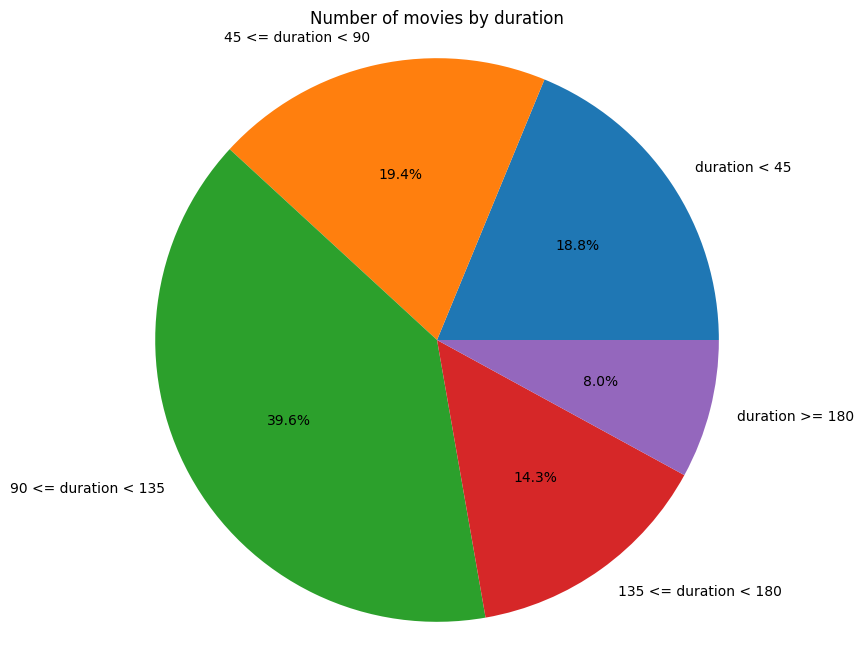

In [74]:
duration = movies['duration']
movies_duration = ["duration < 45", "45 <= duration < 90", "90 <= duration < 135", "135 <= duration < 180", "duration >= 180"]
movies_45 = movies[movies['duration'] < 45]['duration'].count()
movies_90 = movies[(movies['duration'] < 90) & (movies['duration'] >= 45)]['duration'].count()
movies_135 = movies[(movies['duration'] < 135) & (movies['duration'] >= 90)]['duration'].count()
movies_180 = movies[(movies['duration'] < 180) & (movies['duration'] >= 135)]['duration'].count()
movies_long = movies[movies['duration'] >= 180]['duration'].count()

data = {
    'duration': [movies_45, movies_90, movies_135, movies_180, movies_long]
}

df = pd.DataFrame(data, index=movies_duration)
df.groupby('duration')
plt.figure(figsize=(8, 8))
plt.pie(df['duration'], labels=df.index, autopct='%1.1f%%')
plt.title('Number of movies by duration')
plt.axis('equal')

- Nhận xét: 
    + Có 92 bộ phim có thời lượng dưới 45 phút (chiếm 18.8% tổng số phim). Đây là một số lượng đáng kể, cho thấy sự phát triển của các dự án phim ngắn hoặc nhu cầu của khán giả đối với các bộ phim ngắn.
    + Khoảng thời lượng từ 45 phút đến dưới 90 phút có 95 bộ phim (chiếm 19.4% tổng số phim). Đây là khoảng thời gian phổ biến cho các bộ phim có thời lượng trung bình, bao gồm nhiều thể loại như hài hước, lãng mạn, hoạt hình và hành động.
    + Khoảng thời lượng từ 90 phút đến dưới 135 phút có 194 bộ phim (chiếm 39.6% tổng số phim). Đây là một khoảng thời gian phổ biến cho các bộ phim trên màn ảnh rộng, bao gồm cả các bộ phim tài liệu, hành động và giả tưởng.
    + Khoảng thời lượng từ 135 phút đến dưới 180 phút có 70 bộ phim (chiếm 14.3% tổng số phim). Đây là một số lượng khá lớn và cho thấy sự xuất hiện của các bộ phim dài, như phim điện ảnh hoặc phim truyền hình đặc biệt.
    + Có 39 bộ phim có thời lượng 180 phút trở lên (chiếm 8% tổng số phim). Đây là một số lượng ít hơn so với các khoảng thời gian khác, nhưng vẫn đại diện cho các bộ phim có thời lượng lớn như các bộ phim siêu anh hùng hoặc các bộ phim truyền hình dài hạn.
    + Tóm lại, trực quan hóa số lượng phim theo thời lượng cung cấp cái nhìn tổng quan về phân bố của các bộ phim dựa trên thời lượng của chúng. Nó cho thấy sự đa dạng về thời lượng và tiêu chuẩn của các bộ phim và có thể phản ánh nhu cầu và sở thích của khán giả đối với các dạng phim khác nhau.

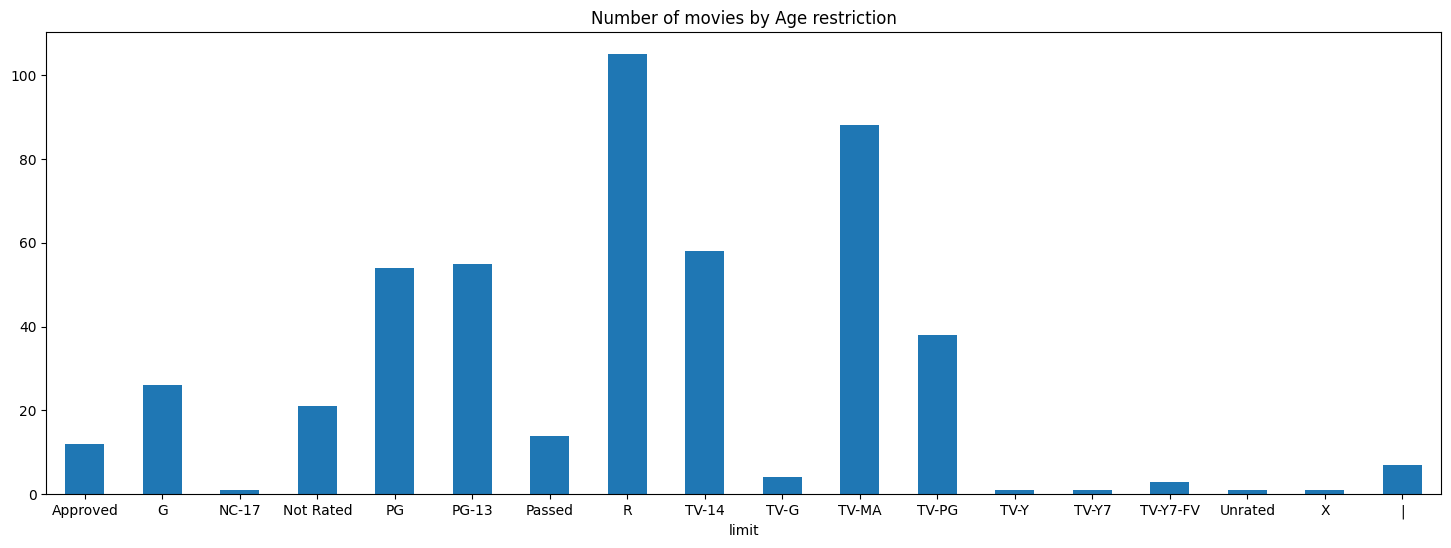

In [75]:
limit = movies.head(50)['limit']
df = pd.DataFrame(movies['limit']).groupby('limit').size()
df.plot.bar(figsize=(18,6))
plt.title('Number of movies by Age restriction')
plt.xticks(rotation='horizontal')
plt.show()

In [76]:
user = pd.read_csv("../dataset/user_final.csv")
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1003 non-null   object
 1   username  1003 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
